In [46]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [47]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("/MNIST_data")

Extracting /MNIST_data\train-images-idx3-ubyte.gz
Extracting /MNIST_data\train-labels-idx1-ubyte.gz
Extracting /MNIST_data\t10k-images-idx3-ubyte.gz
Extracting /MNIST_data\t10k-labels-idx1-ubyte.gz


In [48]:
# To plot an image on the screen we will be using the helper function 
def display_function(digit):
    plt.imshow(digit.reshape(28,28),cmap="Greys",interpolation='nearest')

In [49]:
training_digits,trainig_labels=mnist.train.next_batch(1000)
test_digits,test_labels=mnist.test.next_batch(200)

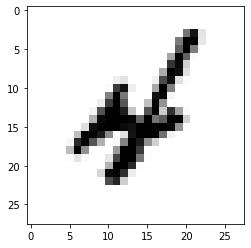

In [50]:
display_function(training_digits[2])

In [51]:
# We will specify some variables to define our convolution layer 
height=28
width=28
channels=1
n_inputs=height*width

In [52]:
#designing our first convolution layer 
conv1_feature_maps=32
conv1_kernel_size=3
conv1_stride=1
conv1_pad='SAME'



In [53]:
#designing  second convolution layer 
conv2_feature_maps=64
conv2_kernel_size=3
conv2_stride=2
conv2_pad="SAME"   # input to be zero padded 

In [54]:
## Pooling layer will be having same number of feature maps as last convolution layer 
pool3_feature_maps=conv2_feature_maps

In [55]:
# After this the output from above will finally goes to your fully connected layer 
n_fullyconn1=64
n_outputs=10   # as we wanted to classify the output category from digits 0 to 9 (means 10 outputs possible)

In [56]:
tf.reset_default_graph()

In [57]:
x=tf.placeholder(tf.float32,shape=[None,n_inputs],name="X")

In [58]:
# For CNN, we want the data in the form of 2D
x_reshaped=tf.reshape(x,shape=[-1,height,width,channels])

In [59]:
y=tf.placeholder(tf.int32,shape=[None],name="y")   # This will be a 1D array

In [60]:
# Creating the convolution layer 
conv1=tf.layers.conv2d(x_reshaped,filters=conv1_feature_maps,
                      kernel_size=conv1_kernel_size,
                      strides=conv1_stride,padding=conv1_pad,
                      activation=tf.nn.relu,name="conv1")    


In [61]:
conv2=tf.layers.conv2d(conv1,filters=conv2_feature_maps,
                      kernel_size=conv2_kernel_size,
                      strides=conv2_stride,padding=conv2_pad,
                      activation=tf.nn.relu,name="conv2") 

In [62]:
conv2.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(64)])

In [63]:
pool3=tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")

In [64]:
pool3.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In [65]:
# In order to feed this into fully connected layer, we need to flatten the result of pooling layer 
pool3_flat=tf.reshape(pool3,shape=[-1,7*7*pool3_feature_maps])

In [66]:
# For fully connected layers 
fullyconn1=tf.layers.dense(pool3_flat,n_fullyconn1,activation=tf.nn.relu,name="fc1")

In [67]:
# For softmax layer we need to setup a dense layer 
logits=tf.layers.dense(fullyconn1,n_outputs,name="Output")

In [68]:
# Cost function for above layer will be 
xentropy=tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=y)

# It will takes the dense layer and apply the softmax activation to every neuron in that layer and also uses cross entropy as cost function  

In [69]:
loss=tf.reduce_mean(xentropy)
optimizer=tf.train.AdamOptimizer()
training_op=optimizer.minimize(loss)

In [70]:
correct=tf.nn.in_top_k(logits,y,1)   # Checking the act and predicted value (For higher probability)

accuracy=tf.reduce_mean(tf.cast(correct,tf.float32))

In [71]:
init=tf.global_variables_initializer()  
saver=tf.train.Saver()                        #Allow us to save our trained model 

In [ ]:
n_epochs=5
batch_size=100

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples//batch_size):
            
            x_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={x:x_batch,y:y_batch})
        
        acc_train=accuracy.eval(feed_dict={x:x_batch,y:y_batch})
        
        acc_test=accuracy.eval(feed_dict={x:mnist.test.images,y:mnist.test.labels})
        
        
        print(epoch,"Train Accuracy:",acc_train,"Test Accuracy:",acc_test)
        
        save_path=saver.save(sess,"./my_minst_model")
        
            
            

0 Train Accuracy: 0.98 Test Accuracy: 0.9769
